Some more information on the tarfile library can be found here:
https://docs.python.org/3/library/tarfile.html

Information on using pyarrow to manipulate parquet files
https://arrow.apache.org/docs/python/parquet.html#reading-parquet-and-memory-mapping

Information on reading parquet files with pandas
https://pandas.pydata.org/docs/reference/api/pandas.read_parquet.html

In [69]:
import tarfile
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [44]:
#Load tar.gz file into Python
#We are using 1 of 7

tar = tarfile.open("hitdata7days_0.tar.gz","r:gz")

In [10]:
#Extract all parquet files into computer memory
#Only need this once

tar.extractall()

In [34]:
#tar.next() example. But be careful to reinstantiate tar when needed
#gopes through each file in TAR file
#can be regular data file opr directory

tar.next()

<TarInfo 'hitdata7days/visitday=10/0017_part_00.parquet' at 0x7fd89f71d700>

In [35]:
#Extracting filename from TarInfo object
#Gives name of file - can be regular data file or directory 

tn = tar.next()
tn.name

'hitdata7days/visitday=10/0050_part_00.parquet'

In [36]:
#Check if TarInfo is a file or a directory
#Good condition to through in a loop

print(tn.isreg())
print(tn.isdir())

True
False


In [37]:
#Reading info from parquet file
#Gives info on data types of columns in 1 parquet file

pq.read_schema(tn.name)

hitdatahistorymkey: int64
filename: string
linenumber: int32
brandcode: string
visitoridhigh: decimal128(20, 0)
visitoridlow: decimal128(20, 0)
visitnumber: decimal128(10, 0)
visitdatetime: timestamp[ns]
visitdate: date32[day]
visitmonth: int32
fiscalyear: int16
fiscalmonthnumber: int16
fiscalweeknumber: int16
hit_time_gmt: decimal128(11, 0)
service: string
acceptlanguage: string
eventlist: string
homepage: string
ip: string
pageevent: decimal128(3, 0)
pageeventvar1: string
pageeventvar2: string
pagetype: string
pageurl: string
pagename: string
productlist: string
userserver: string
channel: string
sitesection: string
category: string
subcategory: string
subcategory2: string
pagecategory: string
searchterms: string
searchresults: string
refinementtype: string
refinementattribute: string
myaccountengagement: string
formanalysis: string
emailsubscriptionadd: string
emailsubscriptionremove: string
linklocation: string
navigationlinks: string
searchtype: string
businessunit: string
categor

In [38]:
#Read in parquet file as pandas DataFrame
#Turns parquet file into data frame

df = pd.read_parquet(tn.name)

In [39]:
df.head()

,hitdatahistorymkey,filename,linenumber,brandcode,visitoridhigh,visitoridlow,visitnumber,visitdatetime,visitdate,visitmonth,fiscalyear,fiscalmonthnumber,fiscalweeknumber,hit_time_gmt,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar1,pageeventvar2,pagetype,pageurl,pagename,productlist,userserver,channel,sitesection,category,subcategory,subcategory2,pagecategory,searchterms,searchresults,refinementtype,refinementattribute,myaccountengagement,formanalysis,emailsubscriptionadd,emailsubscriptionremove,linklocation,navigationlinks,searchtype,businessunit,categoryxid,alternative,rbtused,resulttype,refinementattribute2,refinementattribute3,refinementattribute4,refinementattribute5,refinementattribute6,refinementattribute7,pagetypemerch,prop29,flashcreative,flashcreativeengagement,pdpengagement,prop33,prop34,prop35,prop36,prop37,prop38,prop39,prop40,prop41,language,prop43,prop44,prop45,prop46,prop47,prop48,prop49,prop50,ordernumber,state,useragent,zip,searchengine,excludehit,hier1,hier2,hier3,hier4,hier5,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,postttimeinfo,javascript,language_0001,os,plugins,resolution,lasthittimegmt,firsthittimegmt,visitstarttimegmt,lastpurchasetimegmt,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,postcampaign,sitesection_0001,category_0001,subcategory_0001,subcategory2_0001,internaltrackingcode,searchterms_0001,productfindingmethods,paymentmethod,shippingmethod,ordernumber_0001,warrantiespresented,warrantycategory,crosssoldproduct,crosssoldinfluence,crossselltype,evar16,promocode,formanalysis2,calculatorengagement,bazaarvoice,catalogid,customerconnection,evar23,evar24,evar25,evar26,scene7,evar28,addonsbuytogether,addonsymal,mvtparameters,evar34,evar35,evar36,evar37,evar38,evar39,language_0002,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,cdeemailoptin,evar48,paidsearchrawquery,evar50,post_evar1,post_evar2,post_evar3,post_evar4,post_evar5,post_evar6,post_evar7,post_evar8,post_evar9,post_evar10,post_evar11,post_evar12,post_evar13,post_evar14,post_evar15,post_evar16,post_evar17,post_evar18,post_evar19,post_evar20,post_evar21,post_evar22,post_evar23,post_evar24,post_evar25,post_evar26,post_evar27,post_evar28,post_evar29,post_evar30,post_evar33,post_evar34,post_evar35,post_evar36,post_evar37,post_evar38,post_evar39,post_evar40,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar47,post_evar48,post_evar49,post_evar50,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,visitid,cookieid,checkoutthankyouflag,evar51,evar52,evar53,evar54,evar55,evar56,evar57,evar58,evar59,evar60,evar61,evar62,evar63,evar64,evar65,evar66,evar67,evar68,evar69,evar70,evar71,evar72,evar73,evar74,evar75,evar76,evar77,evar78,evar79,evar80,evar81,evar82,evar83,evar84,evar85,evar86,evar87,evar88,evar89,evar90,evar91,evar92,evar93,evar94,evar95,evar96,evar97,evar98,evar99,evar100,initialloaddate,updatedloaddate,devicetype
0,18600668503,hit_data_fingerhutcomprod_2022-12-10.tsv,1730205,FDM,3999220815818850132,4134380645097416954,266,2022-12-10 09:17:21,2022-12-10,12,2022,12,50,1670685441,pe,"en-US,en;q=0.9",10004,U,98.52.208.41,10,None,ContentSquare,None,https://www.fingerhut.com/search/Electronics/C...,Electronics:Computers & Laptops:Desktop Computers,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,None,0,0,None,None,None,None,None,1173970554,625,1360,Y,N,Y,2,2,304,comcast.net,10/11/2022 9:17:18 6 360,7,45,1240087047,No

In [47]:
#Read in parquet file as pandas DataFrame, but with limtied columns

columns = ['searchengine']
df2 = pd.read_parquet(tn.name,columns=columns)

In [48]:
df2

,searchengine
0,0
1,0
2,0
3,0
4,0
...,...
143082,0
143083,0
143084,0
143085,0


In [51]:
%%time
#Collect columns from all parquet files into a pandas DataFrame

columns = ['geocountry', 'georegion']
dfs = []
for member in tar:
    if member.isreg():
        df_temp = pd.read_parquet(member.name,columns = columns)
        dfs.append(df_temp)

df_all = pd.concat(dfs)

CPU times: user 814 ms, sys: 171 ms, total: 985 ms
Wall time: 869 ms


In [52]:
df_all

,geocountry,georegion
0,usa,nm
1,usa,va
2,usa,hi
3,usa,co
4,usa,ms
...,...,...
135658,usa,oh
135659,usa,pa
135660,usa,ca
135661,usa,pa


In [89]:
usa = df_all[df_all['geocountry'] == 'usa']

In [98]:
counts = pd.DataFrame(usa.groupby(['georegion'])['georegion'].count())

counts.rename(columns={"georegion": "counts"}, inplace=True,)

counts = counts.sort_values(['counts'], ascending=[0])

graph = counts.reset_index()

graph

,georegion,counts
0,tx,538290
1,ca,475662
2,fl,408975
3,pa,386655
4,ny,374695
5,ga,344189
6,va,293988
7,oh,291272
8,nc,257145
9,il,251194


([<matplotlib.patches.Wedge at 0x7fd7a293bb80>,
 [Text(0.9644551520324559, 0.5289860676029687, 'tx'),
  Text(0.13619699443638292, 1.0915357890177013, 'ca'),
  Text(-0.7089188792929728, 0.8410909716445635, 'fl'),
  Text(-1.0908670731318584, 0.1414532741110394, 'pa'),
  Text(-0.9197386775476967, -0.6033910548084171, 'ny'),
  Text(-0.34622698084285347, -1.0440914125384053, 'ga'),
  Text(0.29825127409319935, -1.058794681466517, 'va'),
  Text(0.8042804304053474, -0.7504218741927701, 'oh'),
  Text(1.0685620131973304, -0.26110385663882624, 'nc')])

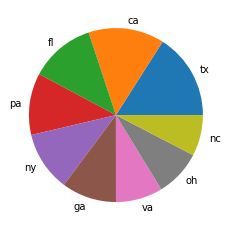

In [104]:
mylabels = graph['georegion'][0:9]

plt.pie(counts['counts'][0:9], labels = mylabels)